# Lecture 1 Statistical Learning Concepts

In the previous lecture we saw a myriad of AI and machine learning applications
 - Protein folding
 - Image generation
 - Climate forecasting

These areas are incredibly different, but the way we craft models for each is largely the same.

There are unifying principles for constructing and evaluating __learning systems__ to solve a vast array of problems.
 - Understanding these principles allows you to better understand when, how and why your model works
 - Develop new models and generalize old models, see commonalities across disciplines
 - Guide you towards more informed model choices


These principles are called __statistical learning theory__. SLT gives us a rigorous framework for 
1. Defining __learning__ problems and building models
3. Analyzing the performance of machine learning models (theoretically and empirically)


## Statistical learning theory

> SLT is the subfield of Statistics / Computer Science tries to understand when, how, and why machine learning algorithms work.

Statistical learning is not the same as machine learning. Machine learning is about building models. Statistical learning is about understanding models. 
- Understand the __predictive skill__ of __learning algorithms__

To be an effective machine learning you need to know the basics of learning theory.

## Overview

To get started in ML we need the following basics from SLT

1. How to define a learning problem
2. How to solve learning problems
3. How to evaluate effectiveness

## Background review

The phrase "rigorous framework" means we need mathematics.
- https://cs229.stanford.edu/section/cs229-linalg.pdf
- https://nowak.ece.wisc.edu/ece830/ece830_fall11_lecture2.pdf

For the really interested
 - http://maxim.ece.illinois.edu/teaching/SLT/

Machine learning practice often greatly outpaces statistical learning theory. 
- Many empirical discoveries are not predicted by theory!
- Still it is a useful tool for eventually understanding why things work
- We will focus on machine learning practice, but some theory will also be included


# Section 1 - How to define a learning problem

> Machine learning is the art and science of building __models__ that __learn__ from data to accomplish a set of tasks

Lets reformulate this nebulous goal into something a little more concrete



### Tasks

All learning problems start with a __task__. A task is something that you would like to do 
 - Classify images
 - Predict bitcoin price

but, typically, is hard or inconventient to do.

In this class we will focus almost exclusively on task that involve __predicting__ one random variable $Y$ from another random variable $X$.

### Solving tasks

Suppose we have a task that we want to complete (or automate etc.) We're going to teach a machine to do it for us! 

What does a machine need to learn how to solve a task?

1. Data
2. Model family
3. Loss function

## Part 1 Data

Task: Our goal is to predict $Y$ given $X$.

- Ex. For a medical diagnosis, $X$ might record the outcome of a medical test and $Y$ could be whether you have a disease or not. $Y = $ {0, 1}

- Ex. In image classification, $X$ is a picture of an object and $Y$ is the name of the object. $Y = $ {house, boat, car, horse, etc...}

- Ex. For housing price forecasting, $X$ could record the features of your house (size, number of bathrooms/bedrooms, previous price, etc.) and $Y$ is the price tomorrow. $Y = [0, \infty)$

### Collecting data


- Do not know the exact relationship between $X$ and $Y$. 
  - We do not know the exact joint distribution of $(X, Y)$ 
  - or the conditional distribution $Y \mid X$

- Instead, suppose we can sample the distribution of $(X, Y)$
 - that is we have access to instances of $(x_i, y_i)$ drawn from the joint distribution of $(X, Y)$
 - $n$ independent draws $\{(x_1,y_i),...,(x_n,y_n)\}$ from the joint distribution of $(X, Y)$.
 - We call this __training data__ 

Because we want to learn the relationship between $X$ and $Y$ we need to gather two types of data. 

1. __Targets__ $y_1,...,y_n$.
  - Otherwise known as labels or dependent variables.
  - This is our ultimate object of interest. we want to be able to predict future values say $y_{n+1}$

2. __Features__ $x_1,...,x_n$.
  - Otherwise known as covariates or independent variables.
  - This is the information that we use to predict $y$. 
  - In statistical learning, the more covariate information the better. Not as interested in selecting (subsetting) variables as in classical statistics but rather quantifying feature importance.
  - We assume there is some relationship between $x_i$ and $y_i$

- We will use the notation $X$ to refer to a random quantity and $x$ to refer to a fixed quantity (data).

- Abstractly we're interested in the relationship between $X$ and $Y$ but we have to settle for the relationship between $x_1,...,x_n$ and $y_1,...,y_n$.
 - And hope the learned relationship __generalizes__ to future data points
 - I.e. that it works for the entire process


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import math

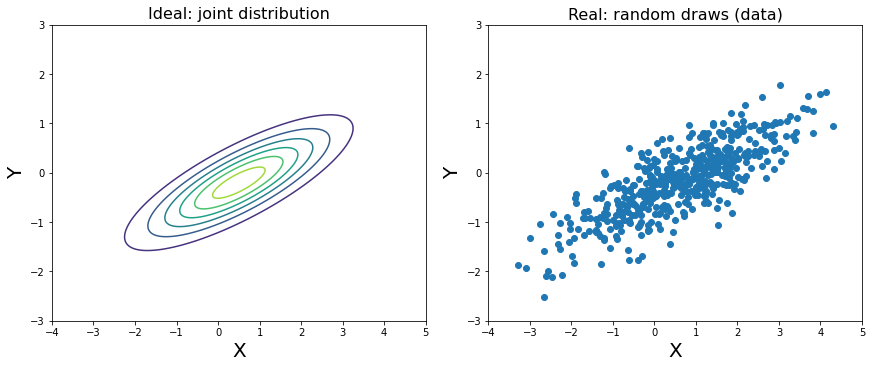

In [5]:
from scipy.stats import multivariate_normal

x, y = np.mgrid[-3:4:.01, -2:2:.01]
pos = np.dstack((x, y))
ideal = multivariate_normal([0.5, -0.2], [[2.0, 0.8], [0.8, 0.5]])

fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (12, 5))
ax[0].contour(x, y, ideal.pdf(pos))
ax[0].set_xlabel('X', fontsize = 20)
ax[0].set_ylabel('Y', fontsize = 20)
ax[0].set_xlim((-4, 5))
ax[0].set_ylim((-3, 3))
ax[0].set_title('Ideal: joint distribution', fontsize = 16)

np.random.seed(0)
realistic = np.random.multivariate_normal([0.5, -0.2], [[2.0, 0.8], [0.8, 0.5]], 500)
ax[1].scatter(realistic[:,0], realistic[:,1])
ax[1].set_xlabel('X', fontsize = 20)
ax[1].set_ylabel('Y', fontsize = 20)
ax[1].set_xlim((-4, 5))
ax[1].set_ylim((-3, 3))
ax[1].set_title('Real: random draws (data)', fontsize = 16)

plt.show()


The process of collecting _good_ data is very challenging. 

We will assume that we have access to data already and that it meets the following conditions
1. Each $x_i \in \mathbb{R}^p$ and $y_i \in \mathbb{R}^q$ 
1. Any pair of observations $(x_i, y_i)$ were collected independently of any $(x_j, y_j)$ for $i \neq j$
2. $(x_i, y_i)$ and $(x_j, y_j)$ have the same distribution for all $i, j$.
3. We have a fixed training sample size $n$, i.e. $1 \leq i \leq n$

Note that all of these assumptions are regularly violated in practice. They just make theory a bit easier. 
 - Condition 1 means that all inputs and outputs (features and targets) are real valued vectors (or can be represented as such).
 - Conditions 2 and 3 are collectively know as $i.i.d$ meaning __I__ndependent and __I__dentically __D__istributed. 
 - Condition 4 just means we do not plan to keep sampling and updating our model

Unless stated otherwise we will assume our data meets these conditions







Here is another example of data that we will often work with. Pairs of images and labels.
- Each image $x_i$ is a 64 dimesional vector
- Each label $y_i$ is an integer from 0 to 9

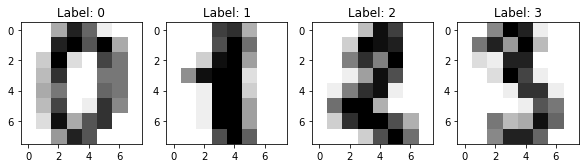

In [4]:
from sklearn import datasets
digits = datasets.load_digits()
x, y = digits.data, digits.target

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)

In [8]:
image, label

(array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
        [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
        [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
        [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
        [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
        [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]]), 3)

## Part 2 Models and Learning

We now have
1. A task (predict $Y$ given $X$)
2. Some training samples $\{(x_1,y_i),...,(x_n,y_n)\}$ 

If we knew the joint distribution of $(X, Y)$ 
- we could find the conditional distribution $Y \mid X$
- this would be the best we could do to describe the relationship between $X$ and $Y$

Instead, we will have to settle for an approximation of the conditional distribution called a __model__ or __predictor__


### A model
In theory a regression model can be any function $f$

$$ f: X \mapsto Y$$


Generally, our model will include an error term to represent our lack of certainty

$$Y = f(X) + \epsilon$$

where $\mathbb{E}[\epsilon] = 0$ and $\text{Var}(\epsilon)= \sigma^2$

Given the the value $X$ we can "predict" $Y$ by simply feeding $X$ through the function $f$

$$\hat{Y} = f(X)$$

and ignoring the error term

__Example:__ Linear regression

In linear regression we assume a linear model (prediction function) from $X$ to $Y$ as

$$ Y = \alpha + \beta X + \epsilon$$

and make predictions as

$$\hat{Y} = \alpha + \beta X$$

after we learn the values of $\alpha$ and $\beta$.

### Model families

As stated in the previous section we have to learn a statistical relationship, which means don't know the statistical relationship, which means we don't know what $f$ is

Instead we can specify the __type of model__ we want to use. Formally, a pre-supposed __family of predictors__ $\mathcal{F}$
  - These are all the possible predictors we will consider. Different problems require different families of predictors. 
  - Ex. linear predictors $f \in \mathcal{F}$ s.t. $f(x) = \alpha + \beta x$
  - Impossible to learn an arbitrary predictor from features to targets
  - Instead we impose structure on the relationship between features and targets, such as a linear relationship.
  - $\mathcal{F}$ is also known as a hypothesis class

__Example:__ Linear regression

We suppose $\mathcal{F}$ is all linear models, i.e. $f(x) = \alpha + \beta x$ so we model $Y$ as

$$ Y = \alpha + \beta X + \epsilon$$

where $\alpha$ and $\beta$ are unknown. Some examples from this class are plotted below

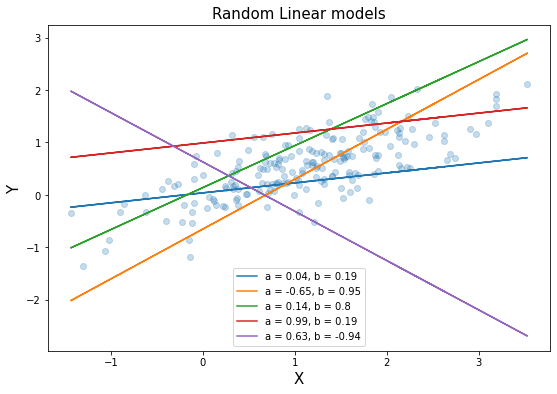

In [ ]:
np.random.seed(1)
x = np.random.normal(1, 1, 200)
y = 0.5 * x + np.random.normal(0, 0.4, 200)

alpha = np.round(np.random.uniform(-1, 1, 5), 2)
beta = np.round(np.random.uniform(-1, 1, 5).reshape(-1, 1), 2)

lm = alpha[:,None] + beta @ x.reshape(1, -1)
lm = lm.T

plt.figure(figsize = (9, 6))
plt.scatter(x, y, alpha = 0.25)
plt.plot(x, lm[:,0], label = f'a = {alpha[0]}, b = {beta[0][0]}')
plt.plot(x, lm[:,1], label = f'a = {alpha[1]}, b = {beta[1][0]}')
plt.plot(x, lm[:,2], label = f'a = {alpha[2]}, b = {beta[2][0]}')
plt.plot(x, lm[:,3], label = f'a = {alpha[3]}, b = {beta[3][0]}')
plt.plot(x, lm[:,4], label = f'a = {alpha[4]}, b = {beta[4][0]}')
plt.xlabel("X", fontsize = 15)
plt.ylabel("Y", fontsize = 15)
plt.title('Random Linear models', fontsize = 15)
plt.legend()
plt.show()

Clearly some of the above lines "fit" the data better than others 

How do we determine which line is best? (including those not plotted)

In other words, how do we find the optimal model $f$ from our class $\mathcal{F}$?

### Choosing function classes (model type)

- In general we do not know the appropriate function class so you will often many different types of models and see which fits best overall
  - Try linear, sinusoidal, exponential, etc. 

- Always assume your function class is __insufficient__ 
  - that is the "true" relationship is is not in your supposed class
  - I.e. the relationship is never truly linear 

- Being exactly correct is not important
  - Just want to find $f$ with a small loss
  - That continues to perform well on future data 


> "all models are wrong, some are useful" -- George Box


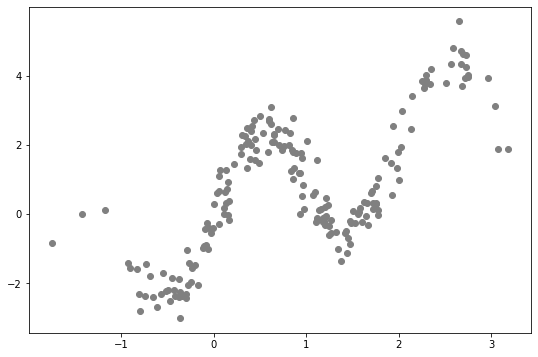

In [ ]:
np.random.seed(0)
x = np.random.normal(0.8, 1, 200)
y = x + 2 * np.sin(math.pi * x) + np.random.normal(0, 0.5, 200)

plt.figure(figsize = (9, 6))
plt.scatter(x, y, c = 'grey')
plt.show()

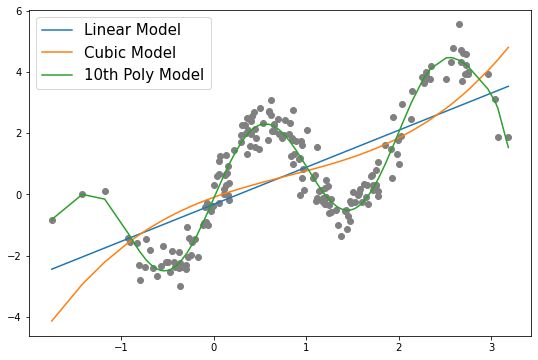

In [ ]:
model1 = np.polyfit(x, y, deg = 1) 
yhat1 = np.polyval(model1, np.sort(x))

model2 = np.polyfit(x, y, deg = 3) 
yhat2 = np.polyval(model2, np.sort(x))

model3 = np.polyfit(x, y, deg = 10) 
yhat3 = np.polyval(model3, np.sort(x))

plt.figure(figsize = (9, 6))
plt.scatter(x, y, c = 'grey')
plt.plot(np.sort(x), yhat1, label = 'Linear Model')
plt.plot(np.sort(x), yhat2, label = 'Cubic Model')
plt.plot(np.sort(x), yhat3, label = '10th Poly Model')
plt.legend(fontsize = 15)
plt.show()

In [ ]:
yhat1 = np.polyval(model1, x)
yhat2 = np.polyval(model2, x)
yhat3 = np.polyval(model3, x)

np.mean((y - yhat1)**2), np.mean((y - yhat2)**2), np.mean((y - yhat3)**2)

(1.9912144017462436, 1.9112215067701472, 0.21496342628545861)

The type of model we choose can have an enormous impact on our ability to fit the data 

In all cases the model class is __WRONG__

But clearly, some are more useful than others

We will discuss ways of choosing models but ultimately this will come down to experimentation

the bulk of this class will be on specific model classes and chosing which ones to use

## Part 3 Loss functions

We now have
1. A task (predict $Y$ given $X$)
2. Some training samples $\{(x_1,y_i),...,(x_n,y_n)\}$ 
3. A model family $\mathcal{F} =\{ f \mid f:X \mapsto Y \}$

The only outstanding issue is that we dont know which model $f \in \mathcal{F}$ to choose. 
- We don't know which $f \in \mathcal{F}$ most accurately represents the relationship between $X$ and $Y$.

To find the optimal function $f$ we need some way to quantitatively measure how good $f$ is. We do this with a __loss function__.

- A loss function is a mathematical function describing how well your model $f$ fits the data $(x_1, y_1),...,(x_n, y_n)$. We generically denote a loss function as 
$$ \mathcal{L}(f, (x, y)) $$

- The loss function will return a (usually postive) real number. For example the mean square error loss from regression

$$ \mathcal{L}(f, (x, y)) = MSE(f, (x, y)) =  \frac{1}{n} \sum_{i = 1}^n (y_i - f(x_i))^2 $$

- The closer $f(x_i)$ is to $y_i$ on average the smaller $MSE(f, (x, y))$ will be. 

__Example:__ Least Squares (MSE)

https://www.geogebra.org/m/crBa6TAW 

### Optimal models

The loss function is how we define and choose our optimal model. Essentially the optimal model is the model with lowest loss. Mathematically

$$ \hat{f} = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, (x, y))$$

That is we choose $\hat f \in \mathcal{F}$ such that 
$$ 
\mathcal{L}(\hat f, (x, y)) \leq \mathcal{L}(f, (x, y)) \quad \forall f \in \mathcal{F}
$$

__Example:__ Linear models with MSE
$$\hat{\alpha}, \hat{\beta} = \arg\min_{\alpha, \beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \alpha - \beta x_i)^2$$



###Choosing a loss function

- The loss function is how we evaluate models in our model family
- Also defines what it means to be "optimal" (lowest loss)
- Different loss functions lead to different optimal models
   - because the defintition of "optimal" changes
- Choosing a loss function is an integral part of model building
- Two example choices (regression)
 - $MSE(f, (x, y)) = \frac{1}{n} \sum_{i =1}^n (y_i - f(x_i))^2$
 - $MAE(f, (x, y)) = \frac{1}{n} \sum_{i =1}^n |y_i - f(x_i)|$

- Properties of your loss function will determine properties of your selected model
  - $MAE$ is more robust to outliers than $MSE$ so the resulting model will not try to fit the outliers as closely as if it was trained by $MSE$
  - In fact, $MSE$ fits the mean of the conditional distribution and $MAE$ fits the median 

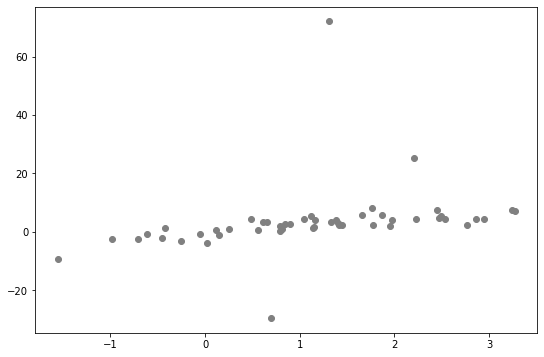

In [9]:
np.random.seed(0)
x = np.random.normal(1, 1, 50)
y = 2 * x + np.random.standard_t(1, 50)

plt.figure(figsize = (9, 6))
plt.scatter(x, y, c = 'grey')
plt.show()

In [10]:
from scipy.optimize import minimize_scalar

## optimize parameters (assume alpha = 0 because it is)
def mse(beta):
  return np.mean((y - beta * x)**2)

def mae(beta):
  return np.mean(np.abs(y - beta * x))

beta_mse = minimize_scalar(mse).x
beta_mae = minimize_scalar(mae).x

In [11]:
print(beta_mse)
print(beta_mae)

3.0827092083550296
2.1927731045882175


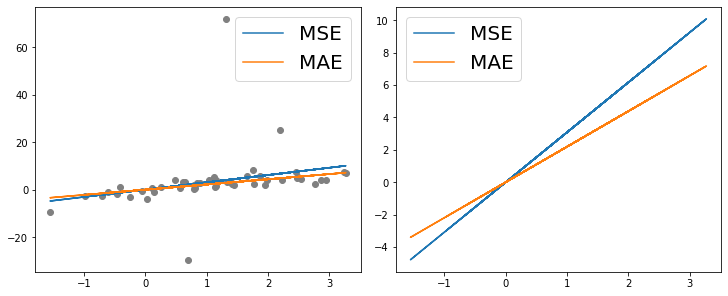

In [14]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (10, 4))

ax[0].scatter(x, y, c = 'grey')
ax[0].plot(x, beta_mse * x, c = 'C0', label = 'MSE')
ax[0].plot(x, beta_mae * x, c = 'C1', label = 'MAE')
ax[0].legend(fontsize = 20)

ax[1].plot(x, beta_mse * x, c = 'C0', label = 'MSE')
ax[1].plot(x, beta_mae * x, c = 'C1', label = 'MAE')
ax[1].legend(fontsize = 20)
plt.show()

- Using the exact same model type (linear model with no intercept) changing the loss funtion has clearly changed the predictor

- In this case, the MAE loss estimated the conditional median while the MSE estimate the conditional mean

- Choice of loss function can have an even larger impact in more complex models 

- The loss is literally our way of telling the model what is import and what is not. 

### Likelihood approaches

In addition to choosing a loss function based on _which properties you want your algorithm to have_

The most common approach to choosing a loss funtion to inspection of the __likelihood__

When we specify a model of the form 

$$
y = f(x) + \epsilon
$$

And assime $f(x)$ is deterministic and $\epsilon$ follows some distribution, then what were actually doing is assuming a distribution on $y$

For example
\begin{align}
y &= f(x) + \epsilon \\
\epsilon &\sim N(0, 1)
\end{align}

Then
$$ Y \mid X = x \sim N(f(x), 1)$$

Because we want $f$ to fit as well as possible we equivalently want to maximize the likelihood of $Y \mid X$.

$$
\prod_{i =1}^n \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(y_i - f(x_i))^2}{2} \right)
$$

or equivalently minimize the negative log likelihood

$$
- \log \prod_{i =1}^n \frac{1}{\sqrt{2\pi}} \exp \left(-\frac{(y_i - f(x_i))^2}{2} \right) \propto \frac{1}{n} \sum_{i =1}^n (y_i - f(x_i))^2
$$

otherwise known as the MSE in this case


We will see that many other loss functions derive from maximum likelihood, such as classification losses.

## Summary - How do we formulate the learning problem


In a typical problem setup...
- We have two random variables $X$ and $Y$. 
- Only $X$ is available for observation
- Want to predict $Y$ given $X$

Assume some model of the form 
$$Y = f(X) + \epsilon$$

Def. A __predictor__ is any "well behaved" function from $X$ to $Y$. Typically call this $f$. We use a predictor to make predictions: $f(X)$ 

Goal: __learn__ a predictor $f$ such that $f(X) \approx Y$.

The main ingredients to specify a typical learning problem are as follows

1. __Targets__ $y_1,...,y_n$. 
  - Otherwise known as labels or dependent variables.
  - This is our ultimate object of interest. we want to be able to predict future values say $y_{n+1}$
2. __Features__ $x_1,...,x_n$.
  - Otherwise known as covariates or independent variables.
  - This is the information that we use to predict $y$. In statistical learning, the more covariate information the better. Not as interested in selecting (subsetting) variables as in classical statistics but rather quantifying feature importance.
  - We assume there is some relationship between $x_i$ and $y_i$
3. The __type of model__ we want to use. Formally, a pre-supposed __family of predictors__ $\mathcal{F}$
  - These are all the possible predictors we will consider. Different problems require different families of predictors. 
  - Ex. linear predictors $f \in \mathcal{F}$ s.t. $f(x) = \alpha + \beta x$
  - Impossible to learn an arbitrary predictor from features to targets
  - Instead we impose structure on the relationship between features and targets, such as a linear relationship.
  - $\mathcal{F}$ is also known as a hypothesis class
4. A __loss__ function $\mathcal{L}(f, (x, y))$
  - Loss functions measure the quality of your predictor. Different loss functions are required for different problems
  - The loss function is how we find the "best" predictor in our pre-supposed family $\mathcal{F}$. I.e. the best model of its kind.
  - Ex. Squared Error $\mathcal{L}(f, (x, y)) = \frac{1}{n} \sum_{i = 1}^n (y_i - f(x_i))^2$


And essentially everything follows through no matter what were doing.
1. Identify the quantitiy (variable) to be predicted
2. Identify information (variables) that might help predict that quantity
3. Choose a model type (linear regression, polynomials, trees, etc.) 
4. Find the best model of that type according to your loss function

Or stated another way we will take a "universal" approach to predictive modeling
1. Sample training data $\{(x_i,y_i)\}_{i = 1}^n$
2. Choose a model class $\mathcal{F} = \{f \mid f:X \mapsto Y \}$
3. Find the best model $\hat f = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, (x, y))$

### Example 1 -- Linear model


Were interested in predicting some target $Y$ using feature $X$. Both are univariate (1 dimension) and plotted against each other.

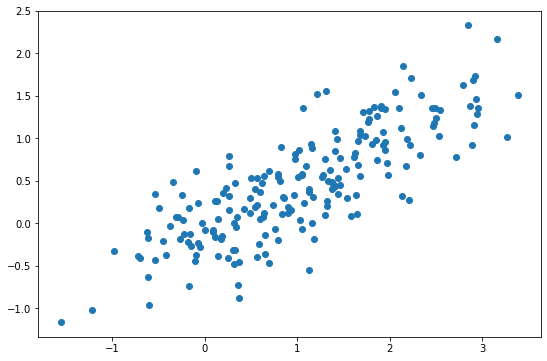

In [16]:
x = np.random.normal(1, 1, 200)
y = 0.5 * x + np.random.normal(0, 0.4, 200)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.show()

- There is a clear linear relationship between $X$ and $Y$ values 
- Thus we decide to impose a linear model, i.e. we assume 
$$ Y = \alpha + \beta X + \epsilon $$
We then further assume that $\alpha = 0$ for simplicity
- Implictly we are defining a family of functions 
$$ \mathcal{F} = \{\beta X : \beta \in \mathbb{R} \}$$
- We want to find the "best fitting" member of $\mathcal{F}$ to match our observations

- How to choose? Lets look at some candidates

We sample random functions by sampling random $\beta$ values and plotting $X\beta$

In [20]:
np.random.seed(0)
alpha = np.random.uniform(-1, 1, 5)
beta = np.random.uniform(-1, 1, 5).reshape(-1, 1)

beta

array([[ 0.29178823],
       [-0.12482558],
       [ 0.783546  ],
       [ 0.92732552],
       [-0.23311696]])

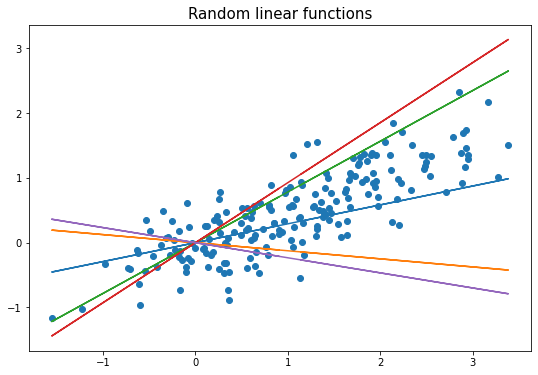

In [18]:
candidates = beta @ x.reshape(1, -1)
candidates = candidates.T

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x, candidates)
plt.title('Random linear functions', fontsize = 15)
plt.show()

Visually we can see that some of the lines "fit" the data well (blue) and others (purple) are terrible 

Lets quantify the fit of a line numerically with a __loss__ function. We will use the __mean squared error__

$$ \mathcal{L}(f, (x, y)) = MSE(f, (x, y)) =  \frac{1}{n} \sum_{i = 1}^n (y - f(x))^2 $$


In [21]:
# example models have a variety of MSEs
np.mean((candidates - y[:,None])**2, axis = 0)

array([0.21958012, 0.90427297, 0.33413331, 0.55638365, 1.1996664 ])

We say that the model with the lowest error is "best"

- How do we find the best possible model? Minimize the loss function.
$$ \hat{f} = \arg\min_{f \in \mathcal{F}} \mathcal{L}(f, (x, y))$$

- Specifically for the MSE 
$$ \hat{f} = \arg\min_{f \in \mathcal{F}}  \frac{1}{n} \sum_{i = 1}^n (y_i - f(x_i))^2$$

- More specifically for our problem (we assume $\alpha = 0$)
$$\hat{\beta} = \arg\min_{\beta \in \mathbb{R}} \frac{1}{n} \sum_{i = 1}^n (y_i - \beta x_i)^2$$

- Which has as an exact solution (least squares solution)
$$\hat{\beta} = \frac{\sum_{i = 1}^n x_i y_i}{\sum_{i = 1}^n x_i^2}$$

- So our optimal function is $\hat{f}(x) = \hat{\beta}x$ (plotted below)


In general the loss funtion will not have an exact solution. We will use iterative methods to minimize the loss.



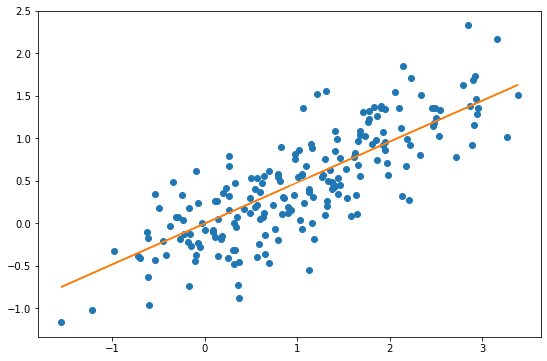

In [22]:
predictor = (x @ y)/(x @ x) * x

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(x, predictor, c = "C1")
plt.show()

In [23]:
# optimal model will have the lowest error (average loss)
np.mean((predictor - y)**2)

0.14540494648731517

In [24]:
# for reference (random guesses)
np.mean((candidates - y[:,None])**2, axis = 0)

array([0.21958012, 0.90427297, 0.33413331, 0.55638365, 1.1996664 ])

### Example 2 -- Wave model


Were interested in predicting some target $Y$ using feature $X$. Both are univariate (1 dimension) and plotted against each other.



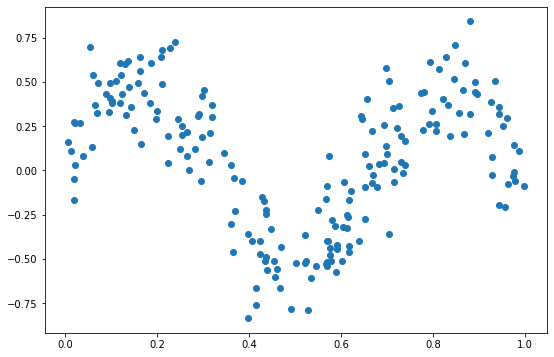

In [26]:
np.random.seed(0)
x = np.random.uniform(0, 1, 200)
y = 0.5 * np.sin(3 * math.pi * x) + np.random.normal(0, 0.2, 200)

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.show()

This time we notice that the relationship between $X$ and $Y$ is more complicated 

We suspect there is a __sinusoidal__ relationship so we will restrict ourselves to fitting __sin__ functions


- Thus we decide to impose a sinusoidal model, i.e. we assume 
$$ Y = \alpha + \beta \sin(3 \pi X) + \epsilon $$
and assume $\alpha = 0$ for simplicity
- Implictly we are defining a family of functions 
$$ \mathcal{F} = \{\beta \sin(3 \pi X) : \alpha \in \mathbb{R}, \beta \in \mathbb{R} \}$$
- We want to find the "best fitting" member of $\mathcal{F}$ to match our observations

- How to choose? Lets look at some candidates

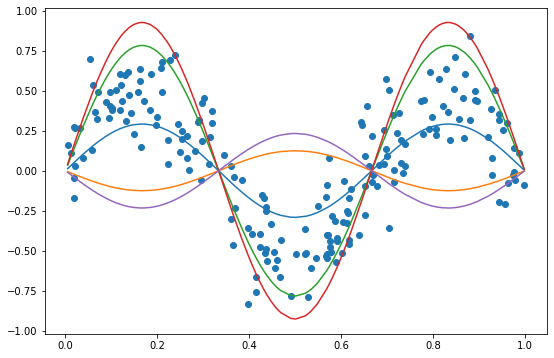

In [27]:
np.random.seed(0)
alpha = np.random.uniform(-1, 1, 5)
beta = np.random.uniform(-1, 1, 5).reshape(-1, 1)

candidates = beta @ np.sin(3 * math.pi * np.sort(x)).reshape(1, -1)
candidates = candidates.T

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(np.sort(x), candidates)
plt.show()

Visually we can see that some of the lines "fit" the data well (blue) and others (purple) are terrible 

We again use the __mean squared error__ to quantify the overall "fit" of the candidate models

$$ \mathcal{L}(f, (x, y)) = MSE(f, (x, y)) =  \frac{1}{n} \sum_{i = 1}^n (y_i - f(x_i))^2 $$

Or more specifically 

$$ MSE(f, (x, y)) =  \frac{1}{n} \sum_{i = 1}^n (y_i - \beta \sin(3 \pi x_i))^2 $$


In [28]:
candidates = beta @ np.sin(3 * math.pi * x).reshape(1, -1)
candidates = candidates.T

# example models have a variety of errors (average loss)
np.mean((candidates - y[:,None])**2, axis = 0)

array([0.05622627, 0.2174611 , 0.07879268, 0.1289382 , 0.28646073])

- Which again has as an exact solution (least squares solution) assuming $\alpha = 0$
$$\hat{\beta} = \frac{\sum_{i = 1}^n \sin(3 \pi x_i) y_i}{\sum_{i = 1}^n \sin(3 \pi x_i)^2}$$

- So our optimal function is $\hat{f}(x) = \hat{\beta}\sin(3 \pi x_i)$ (plotted below)


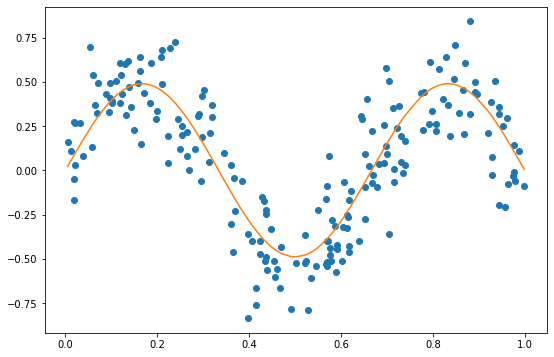

In [29]:
x_feat = np.sin(3 * math.pi * x)

predictor = (x_feat @ y)/(x_feat @ x_feat) * np.sin(3 * math.pi * np.sort(x))

plt.figure(figsize = (9, 6))
plt.scatter(x, y)
plt.plot(np.sort(x), predictor, c = "C1")
plt.show()

In [30]:
predictor = (x_feat @ y)/(x_feat @ x_feat) * np.sin(3 * math.pi * x)

# optimal model will have the lowest error (average loss)
np.mean((predictor - y)**2)

0.03759311948938129

In [31]:
# example models have a variety of errors (average loss)
np.mean((candidates - y[:,None])**2, axis = 0)

array([0.05622627, 0.2174611 , 0.07879268, 0.1289382 , 0.28646073])

### Example 1 vs Example 2

- In both cases we colleceted features $x_1,...,x_n$ and targets $y_1,...,y_n$ 

- In example 1, we plotted the data and suspected a __linear__ relationship so we restricted our search to __linear__ functions of $X$ and $Y$

- In example 2, the relationship was __sinusoidal__ so we restricted our search to __sin__ functions

- Both cases used a mean squared error loss to find the optimal predictor from the pre-defined class of predictors

# Section 2 - Evaluating models

> learning what the machine learns

The central focus of machine learning is teaching our model to make accurate predictions. 
- It does not matter how complex your model is 
- Or that you understand how exactly it works
- We just care that it continues to _predict well in the future_


The problem we encounter is that machine learning models have become very complex
 - Models like ChatGPT have billions of parameters
 - And are trained on millions of observations

How do we know if our model is going to keep working well?
- In general you don't (anything could change)
- But we can get an idea of when it will and wont fail

There are really three issues that we focus on.

1. **Accuracy** - How accurate is my model? Quantify our ability to predict $Y$ given $X$ on average
2. **Uncertainty** - How certain are my predictions? Quantify the error in our predictions.
3. **Generalizability** Will my model continue working in the future? If we observe new observation will our model still be accurate and reliable?



### Accuracy

Given target values $y_1,...,y_n$ and predictions $\hat y_1, ..., \hat y_n$, where $\hat y_i = \hat f(x_i)$, **accuracy** genearlly refers to the "similarity" between each $y_i$ and $\hat y_i$.

Examples:
- Regression - suppose each $y_i, \hat y_i \in \mathbb{R}$ for $i \in {1,...,n}$. A common accuracy score for regression problems is the mean squared error (MSE).
$$MSE = \frac{1}{n}\sum_{i = 1}^n (y_i - \hat y_i)^2$$

- Classification - Suppose each $y_i \in {0, 1}$ and each $\hat y_i \in [0, 1]$. A common accuracy score for classification problems is the Binary Cross Entropy (BCE).
$$BCE = -\frac{1}{n}\sum_{i = 1}^n y_i\log(\hat y_i) + (1 - y_i)\log(1 - \hat y_i)$$


Essentially we will measure accuracy with the loss function. Typically lower values of the loss function mean your model is more accurate. 

## Uncertainty Quantification

Given target values $y_1,...,y_n$ and predictions $\hat y_1, ..., \hat y_n$, where $\hat y_i = \hat f(x_i)$

We quantify the **uncertainty** of our predictions by measuring the similarity of $p(y_i \mid X = x_i)$ and $p(\hat y_i \mid X = x_i)$

Uncertainty quantification is typically concerned with how acccurately your predictive distribution is

There are many notions for quantifying uncerainty. More on this later!

## Generalization

Here's the situation
-  We trained our $f$ model with the loss function $\mathcal{L}$ on the data sequence $$(x_1,y_1),...,(x_n,y_n) \sim P$$ to learn $\hat f$.
- We evaluated the accuracy of $\hat f$ and found that $\mathcal{L}(y, \hat y) = \epsilon$

What if we observe another data sequnce?
$$(x_{n+1},y_{n+1}),...,(x_{n+m},y_{n+m}) \sim P$$

Will $\mathcal{L}(y, \hat y) \approx \epsilon$ on this new (test) set?

Our first thought may be to look at the training loss
- We minimized the training loss on a large dataset so that our model would fit the data well
- If it fit this data well shouldn't it fit future data well?

Lets look at an example

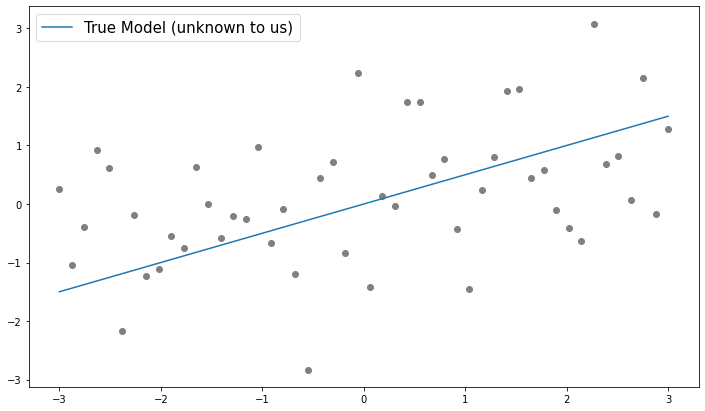

In [ ]:
np.random.seed(0)

n = 50
beta = 0.5

x_train = np.linspace(-3, 3, n)
y_train = beta * x_train + np.random.normal(0, 1, n)

plt.figure(figsize = (12, 7))
plt.scatter(x_train, y_train, c = 'grey')
plt.plot(x_train, beta * x_train, label = 'True Model (unknown to us)')
plt.legend(fontsize = 15)
plt.show()

We observe the grey datapoints and want to model the relationship between $X$ and $Y$
- We dont see the true relationship (blue line)
- So lets try a few models out

We'll try
1. Linear model
2. A 6th degree polynomial
3. A 12th degree polynomial

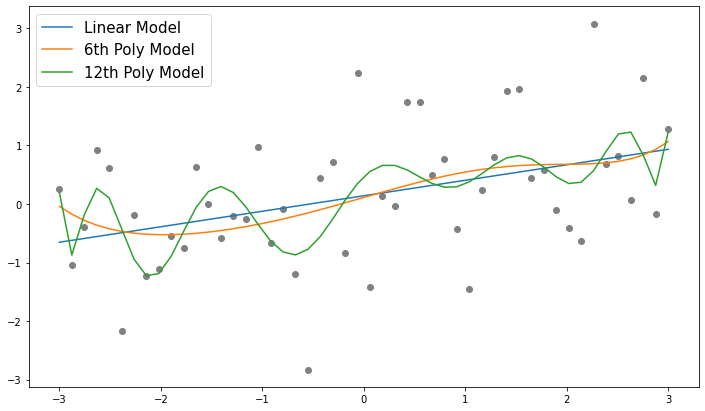

In [ ]:
np.random.seed(0)

n = 50
beta = 0.5

x_train = np.linspace(-3, 3, n)
y_train = beta * x_train + np.random.normal(0, 1, n)

### fit on train
model1 = np.polyfit(x_train, y_train, deg = 1) 
model2 = np.polyfit(x_train, y_train, deg = 6)
model3 = np.polyfit(x_train, y_train, deg = 12)

yhat1_train = np.polyval(model1, np.sort(x_train))
yhat2_train = np.polyval(model2, np.sort(x_train))
yhat3_train = np.polyval(model3, np.sort(x_train))

# fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (18, 6))

plt.figure(figsize = (12, 7))
plt.scatter(x_train, y_train, c = 'grey')
plt.plot(np.sort(x_train), yhat1_train, label = 'Linear Model')
plt.plot(np.sort(x_train), yhat2_train, label = '6th Poly Model')
plt.plot(np.sort(x_train), yhat3_train, label = '12th Poly Model')
plt.legend(fontsize = 15)
plt.show()

In [ ]:
# train error
mse1_train = np.mean((y_train - yhat1_train)**2)
mse2_train = np.mean((y_train - yhat2_train)**2)
mse3_train = np.mean((y_train - yhat3_train)**2)

print('Loss on initial dataset')
print(f'Linear model MSE: {round(mse1_train, 3)}') 
print(f'6th Poly. MSE   : {round(mse2_train, 3)}') 
print(f'12th Poly MSE   : {round(mse3_train, 3)}')

Loss on initial dataset
Linear model MSE: 1.094
6th Poly. MSE   : 1.065
12th Poly MSE   : 0.91


On our initial dataset the linear model was __worst__ and the 12th degree polynomial was __best__
- On the data we trained on the most complicated model performed the best
- What about on future data?

Lets suppose we observe some more data
- `x_test` and `y_test`
- How do the three models perform?


We apply each model (trained on the initial dataset) to the new data `x_test` and `y_test` without refitting the model.

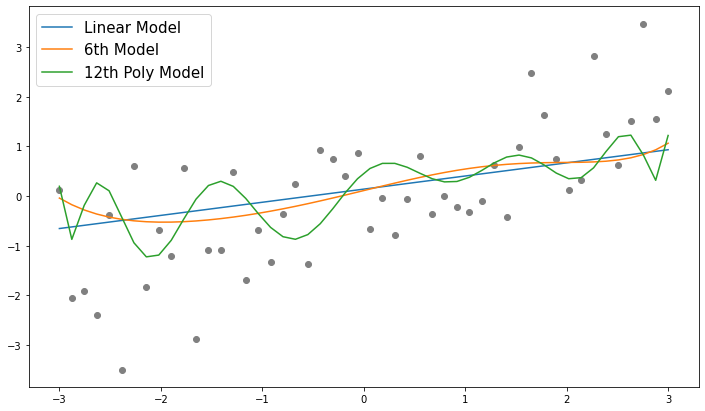

In [ ]:
np.random.seed(1)

### test on test
x_test = np.linspace(-3, 3, n)
y_test = beta * x_test + np.random.normal(0, 1, n)

yhat1_test = np.polyval(model1, np.sort(x_test))
yhat2_test = np.polyval(model2, np.sort(x_test))
yhat3_test = np.polyval(model3, np.sort(x_test))

plt.figure(figsize = (12, 7))
plt.scatter(x_test, y_test, c = 'grey')
plt.plot(np.sort(x_test), yhat1_test, label = 'Linear Model')
plt.plot(np.sort(x_test), yhat2_test, label = '6th Model')
plt.plot(np.sort(x_test), yhat3_test, label = '12th Poly Model')
plt.legend(fontsize = 15)
plt.show()

In [ ]:
# test error
mse1_test = np.mean((y_test - yhat1_test)**2)
mse2_test = np.mean((y_test - yhat2_test)**2)
mse3_test = np.mean((y_test - yhat3_test)**2)

print('Loss on subsequent dataset')
print(f'Linear model MSE: {round(mse1_test, 3)}') 
print(f'6th Poly. MSE   : {round(mse2_test, 3)}') 
print(f'12th Poly MSE   : {round(mse3_test, 3)}')

Loss on subsequent dataset
Linear model MSE: 1.24
6th Poly. MSE   : 1.259
12th Poly MSE   : 1.451


- Now the order is reversed!?

- Our best model, the 12th degree polynomial is now the worst and linear is the best

- Is this a coincidence?

- Lets check again. We again apply the model (trained on the initial dataset) to new data `x_test` and `y_test` without refitting the model

In [ ]:
### test on test
np.random.seed(100)
x_test = np.linspace(-3, 3, n)
y_test = beta * x_test + np.random.normal(0, 1, n)

yhat1_test = np.polyval(model1, np.sort(x_test))
yhat2_test = np.polyval(model2, np.sort(x_test))
yhat3_test = np.polyval(model3, np.sort(x_test))

mse1_test = np.mean((y_test - yhat1_test)**2)
mse2_test = np.mean((y_test - yhat2_test)**2)
mse3_test = np.mean((y_test - yhat3_test)**2)

print('Loss on third dataset')
print(f'Linear model MSE: {round(mse1_test, 3)}') 
print(f'6th Poly. MSE   : {round(mse2_test, 3)}') 
print(f'12th Poly MSE   : {round(mse3_test, 3)}')

Loss on third dataset
Linear model MSE: 0.96
6th Poly. MSE   : 1.022
12th Poly MSE   : 1.094


- Even on this third dataset the linear model is holding strong.

- However
 - Two tests dont prove anything 
 - Lets try 200 tests and average the results

In [ ]:
np.random.seed(100)

nsim = 200
mse1_test = np.zeros(nsim)
mse2_test = np.zeros(nsim)
mse3_test = np.zeros(nsim)

for i in range(nsim):
  x_test = np.linspace(-3, 3, n)
  y_test = beta * x_test + np.random.normal(0, 1, n)

  yhat1_test = np.polyval(model1, np.sort(x_test))
  yhat2_test = np.polyval(model2, np.sort(x_test))
  yhat3_test = np.polyval(model3, np.sort(x_test))

  mse1_test[i] = np.mean((y_test - yhat1_test)**2)
  mse2_test[i] = np.mean((y_test - yhat2_test)**2)
  mse3_test[i] = np.mean((y_test - yhat3_test)**2)


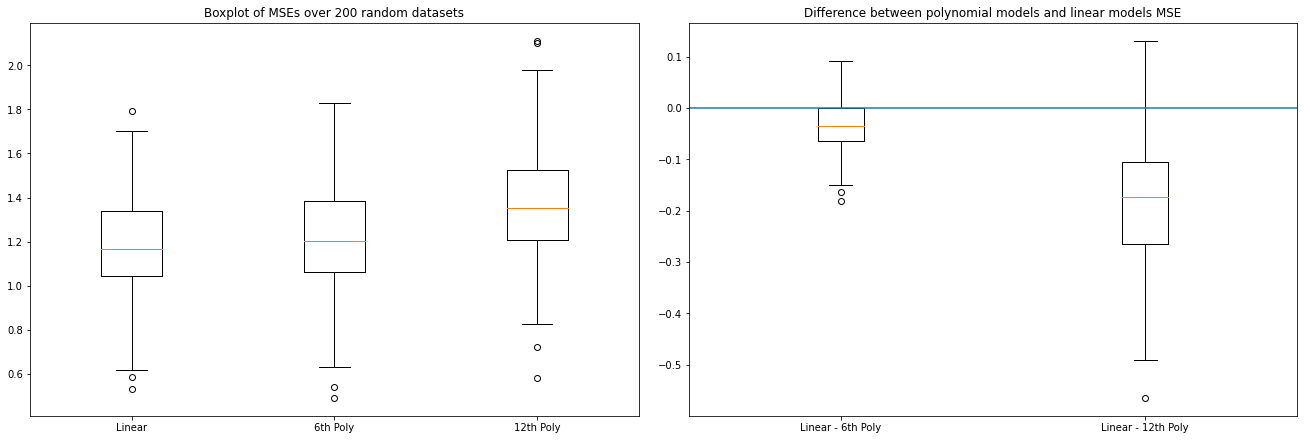

In [ ]:
fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (18, 6))
ax[0].boxplot(np.vstack([mse1_test, mse2_test, mse3_test]).T, 
            labels = ['Linear', '6th Poly', '12th Poly'])
ax[0].set_title('Boxplot of MSEs over 200 random datasets')

ax[1].boxplot(np.vstack([mse1_test - mse2_test, mse1_test - mse3_test]).T, 
            labels = ['Linear - 6th Poly', 'Linear - 12th Poly'])
ax[1].set_title('Difference between polynomial models and linear models MSE')
ax[1].axhline(0)
plt.show()

In [ ]:
print('Average loss on new dataset')
print(f'Linear model MSE: {round(np.mean(mse1_test), 3)}') 
print(f'6th Poly. MSE   : {round(np.mean(mse2_test), 3)}') 
print(f'12th Poly MSE   : {round(np.mean(mse3_test), 3)}')

Average loss on new dataset
Linear model MSE: 1.192
6th Poly. MSE   : 1.225
12th Poly MSE   : 1.381


Clearly its not enough that our model performs well on the training dataset. Our best performer on training ended up being the worst performer on all of the "future" datasets

### Fitting and Overfitting

Why is this the case? There is phenomenon called __overfitting__ that can (and likely will) happen.

Overfitting means that our learned model is too specialized to the specific dataset that we trained on 
- Essentially our model started fitting the "noise" in the data 

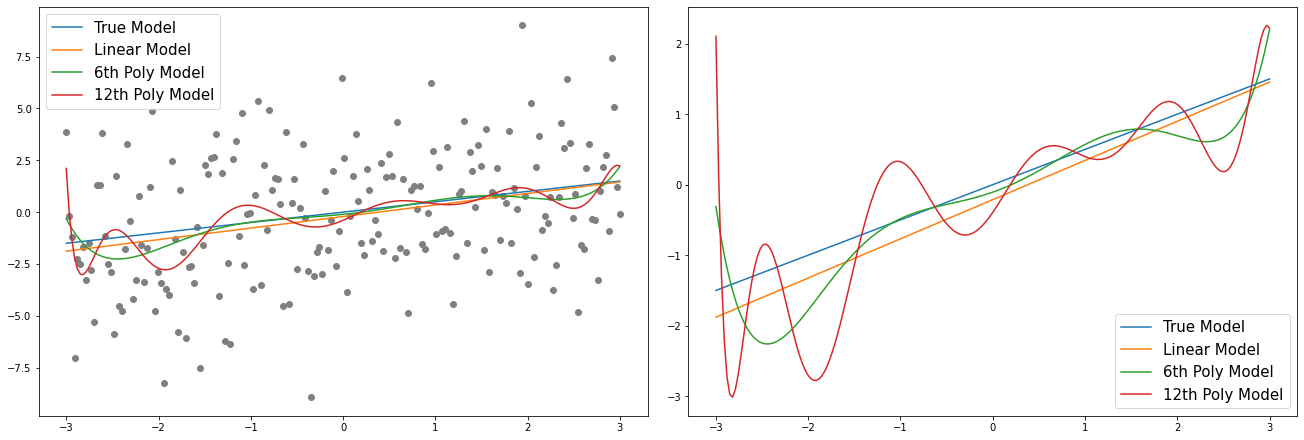

In [ ]:
np.random.seed(3)

n = 200
beta = 0.5

x_train = np.linspace(-3, 3, n)
y_train = beta * x_train + np.random.normal(0, 3, n)

### fit on train
model1 = np.polyfit(x_train, y_train, deg = 1) 
model2 = np.polyfit(x_train, y_train, deg = 6)
model3 = np.polyfit(x_train, y_train, deg = 12)

yhat1_train = np.polyval(model1, np.sort(x_train))
yhat2_train = np.polyval(model2, np.sort(x_train))
yhat3_train = np.polyval(model3, np.sort(x_train))


fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (18, 6))

ax[0].scatter(x_train, y_train, c = 'grey')
ax[0].plot(x_train, x_train * beta, label = 'True Model')
ax[0].plot(x_train, yhat1_train, label = 'Linear Model')
ax[0].plot(x_train, yhat2_train, label = '6th Poly Model')
ax[0].plot(x_train, yhat3_train, label = '12th Poly Model')
ax[0].legend(fontsize = 15)

ax[1].plot(x_train, x_train * beta, label = 'True Model')
ax[1].plot(x_train, yhat1_train, label = 'Linear Model')
ax[1].plot(x_train, yhat2_train, label = '6th Poly Model')
ax[1].plot(x_train, yhat3_train, label = '12th Poly Model')
ax[1].legend(fontsize = 15)
plt.show()

In this case the true model is a linear model with gaussian white noise around it. 
- Our linear model came closest to capturing the underlying "structure" of the model. I.e. the true mean of the conditional distribution.
- the 6th and 12th degree polynomial deviate from the True model because they are trying to fit the individual data points, i.e. noise about the true model


How can we know a situation like this is happening without knowing the true model?

Sample splitting and checking the __generalization gap__
- Split the data into two distinct datasets (train and test)
- Check the difference between training and testing error


### Sample splitting

The best (and easiest) way to evaluate how well our model performs in the future is to simply evaluate it on some "future" data
- Because its the present we don't have future data
- But we can emulate it through __sample splitting__



The most common approach is to randomly split the data into two datasets 
 - Train: We use this data to fit (train) our model
 - Test: We use this data to evaluate (test) our model

In [ ]:
# classic example of high degree poly failing to generalize?
# from numpy.polynomial.polynomial import Polynomial
np.random.seed(3)

n = 200
beta = 0.5

x = np.linspace(-3, 3, n)
y = beta * x + np.random.normal(0, 3, n)

# 70/30 train/test split
idx = np.random.choice(range(n), int(n*0.7), replace=False)
mask = np.zeros(n, dtype=bool)
mask[idx] = True

x_train = x[mask]
y_train = y[mask]
x_test = x[~mask]
y_test = y[~mask]

print(f'Original sample size: {x.shape[0]}')
print(f'Train sample size:    {x_train.shape[0]}')
print(f'Test sample size:     {x_test.shape[0]}')

Original sample size: 200
Train sample size:    140
Test sample size:     60


- All features of the datset need to be included in the training and testing dataset

In [ ]:
# classic example of high degree poly failing to generalize?
# from numpy.polynomial.polynomial import Polynomial
np.random.seed(3)

n = 200
beta = 0.5

# suppose we have 10 features
x = np.random.normal(0, 1, [n, 10])
y = beta * x[:,0] + np.random.normal(0, 3, n)

# 70/30 train/test split
idx = np.random.choice(range(n), int(n*0.7), replace=False)
mask = np.zeros(n, dtype=bool)
mask[idx] = True

x_train = x[mask]
y_train = y[mask]
x_test = x[~mask]
y_test = y[~mask]

print(f'Original data shape: {x.shape}')
print(f'Train dada shape:    {x_train.shape}')
print(f'Test data shape:     {x_test.shape}')

Original data shape: (200, 10)
Train dada shape:    (140, 10)
Test data shape:     (60, 10)


- In the original dataset there were `n = 200` observations and `p = 10` features
- Using a 70/30 split
  - train has `n = 140` obs and `p = 10` features
  - train has `n = 60` obs and `p = 10` features

- Always split the rows not the columns (except in special circumstances)

#### How does sample splitting help?

The test data is never seen by the model during the fitting process. 
 - Performance on test is far more indicative of future performance than performance on train.
 - Because test essentially is "future" data
 - Intuition: If the model generalizes from train to test then its likely that it will generalize again to any future dataset

Drawback: training on less data usually results in a worse model. Need to ensure there is enough data to train an adequate model.

In [ ]:
# classic example of high degree poly failing to generalize?
# from numpy.polynomial.polynomial import Polynomial
np.random.seed(3)

n = 200
beta = 0.5

x = np.linspace(-3, 3, n)
y = beta * x + np.random.normal(0, 3, n)

# 70/30 train/test split
idx = np.random.choice(range(n), int(n*0.7), replace=False)
mask = np.ones(n, dtype=bool)
mask[idx] = False

x_train = x[mask]
y_train = y[mask]
x_test = x[~mask]
y_test = y[~mask]


### fit on train
model1 = np.polyfit(x_train, y_train, deg = 1) 
model2 = np.polyfit(x_train, y_train, deg = 6)
model3 = np.polyfit(x_train, y_train, deg = 12)

yhat1_train = np.polyval(model1, np.sort(x_train))
yhat2_train = np.polyval(model2, np.sort(x_train))
yhat3_train = np.polyval(model3, np.sort(x_train))

mse1_train = np.mean((y_train - yhat1_train)**2)
mse2_train = np.mean((y_train - yhat2_train)**2)
mse3_train = np.mean((y_train - yhat3_train)**2)

### evaluate on test
yhat1_test = np.polyval(model1, np.sort(x_test))
yhat2_test = np.polyval(model2, np.sort(x_test))
yhat3_test = np.polyval(model3, np.sort(x_test))

mse1_test = np.mean((y_test - yhat1_test)**2)
mse2_test = np.mean((y_test - yhat2_test)**2)
mse3_test = np.mean((y_test - yhat3_test)**2)

error_df = pd.DataFrame(index = ['Train Error', 'Test Error', 'Gen. Gap'])
error_df['Linear'] = [mse1_train, mse1_test, np.abs(mse1_train - mse1_test)]
error_df['6th Poly'] = [mse2_train, mse2_test, np.abs(mse2_train - mse2_test)]
error_df['12th Poly'] = [mse3_train, mse3_test, np.abs(mse3_train - mse3_test)]

# # generalization gap. Smaller is better. Big differences (usually) mean you way overfit the data
print(error_df)

               Linear   6th Poly  12th Poly
Train Error  8.098561   7.372084   6.228204
Test Error   9.629654  11.431734  15.953868
Gen. Gap     1.531093   4.059650   9.725665


- A "big" gap between Train Error and Test Error indicates that you (likely) overfit your data
- The word "big" depends on context, so there is no rule
- Between two models with equal training error we prefer the one that has a smaller gap

Modeling Goal
- Minimize the training error and the testing error

In fact this can be shown mathematically.


number of samples in train/test more important than proportions

### Inspecting the loss function

The purpose of the loss function is to select the optimal model from a class of models


That means that the loss function essentially determines our model.
- Model performance intrinsically tied to the loss function


To understand model performance we have to understand the loss function
- Generally this means decomposing the loss function to undestand its composition

### Bias and variance trade-off

#### Split Square Errors =  Reducible Error + Irreducible Error

Assume our general model form $$Y = f(X) + \epsilon$$ and $E[\epsilon] = 0$

Suppose we estimate $\hat f$ using an MSE loss on some dataset $(x_1, y_1),...,(x_n, y_n)$

Lets decompose the MSE loss in this situation and see what happens

$$ 
\begin{aligned}
\text{MSE}(f, (x, y)) &= E[y - \hat y]^2 \\
 &= E[f(X) + \epsilon - \hat f(X)]^2 \\
 &= E[f(X) - \hat f(X)]^2 + E[\epsilon]^2 + \underbrace{2E[f(X) + \hat f(X)]E[\epsilon]}_{E[\epsilon] = 0} \\
 &= E[f(X) - \hat f(X)]^2 + E[\epsilon]^2
\end{aligned}
$$

This last part decomposes as 

$$ 
\underbrace{E[f(X) - \hat f(X)]^2}_{\text{Reducible error}} + \underbrace{Var[\epsilon]}_{\text{Irreducible error}}
$$

Already we see that our loss function decomposes into two parts
1. Reducible Error - This error between your fitted function and the true underlying. With better models we can hopefully reduce this to 0.
2. Irreducible Error - This is the error intrinsic to our model which assumed there was error in the data

As any self help book will tell you: we shouldn't focus on the things we cant change (irreducible error)

So lets focus on the what we can control: The reducible error


$$ 
\begin{aligned}
 E[f(X) - \hat f(X)]^2 &=  E[f - E[\hat f] + E[\hat f] - \hat f)]^2 \\
 &=  E[f - E[\hat f]]^2 + E[E[\hat f] - \hat f]^2 + 2E[f - \hat f]E[E[\hat f] - \hat f]] \\
  &=  E[f - E[\hat f]]^2 + E[E[\hat f] - \hat f]^2 \\
  &=  \underbrace{(f - E[\hat f])^2}_{\text{Bias}(\hat f)^2} + Var[\hat f]
\end{aligned}
$$

So we have decomposed the reducible error into two components. Bring back the $f(X)$ notation we have 
$$
\text{Reducible Error} = \text{Bias}(\hat f(X))^2 + Var[\hat f(X)]
$$

- Bias measures the difference between the prediction and the underlying true model

- Variance measures how certain we are that were close to the true model
 - i.e. if we trained on a new dataset is our model still likely to be close to the truth?

Viewed another way
- Bias measures the accuracy of our model on the training set 

- Variance measures how different choices of the train sets would affect the model parameters. Variance measures the stability of our model across training sets

We want models that are 
1. Accurate (low bias)
2. Highly stable (low variance)

We can prove (not in this class) that low bias and variance usually leads to good generalization 



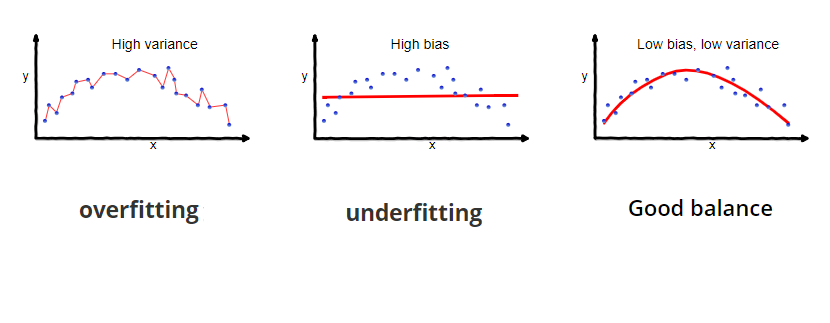

In [ ]:
IPython.display.Image('bias_variance_2.png')

#### Model Complexity and Bias-Variance trade off 

The idea of a tradeoff between "bias" and "variance" of our prediction algorithm comes from inspection of the mean squared error loss $MSE$.

- A different loss function will not necesasrily give such a nice decomposition
- What if I use a different loss? Will the principle hold?


Yes

There will always be some tradeoff between your training and testing error


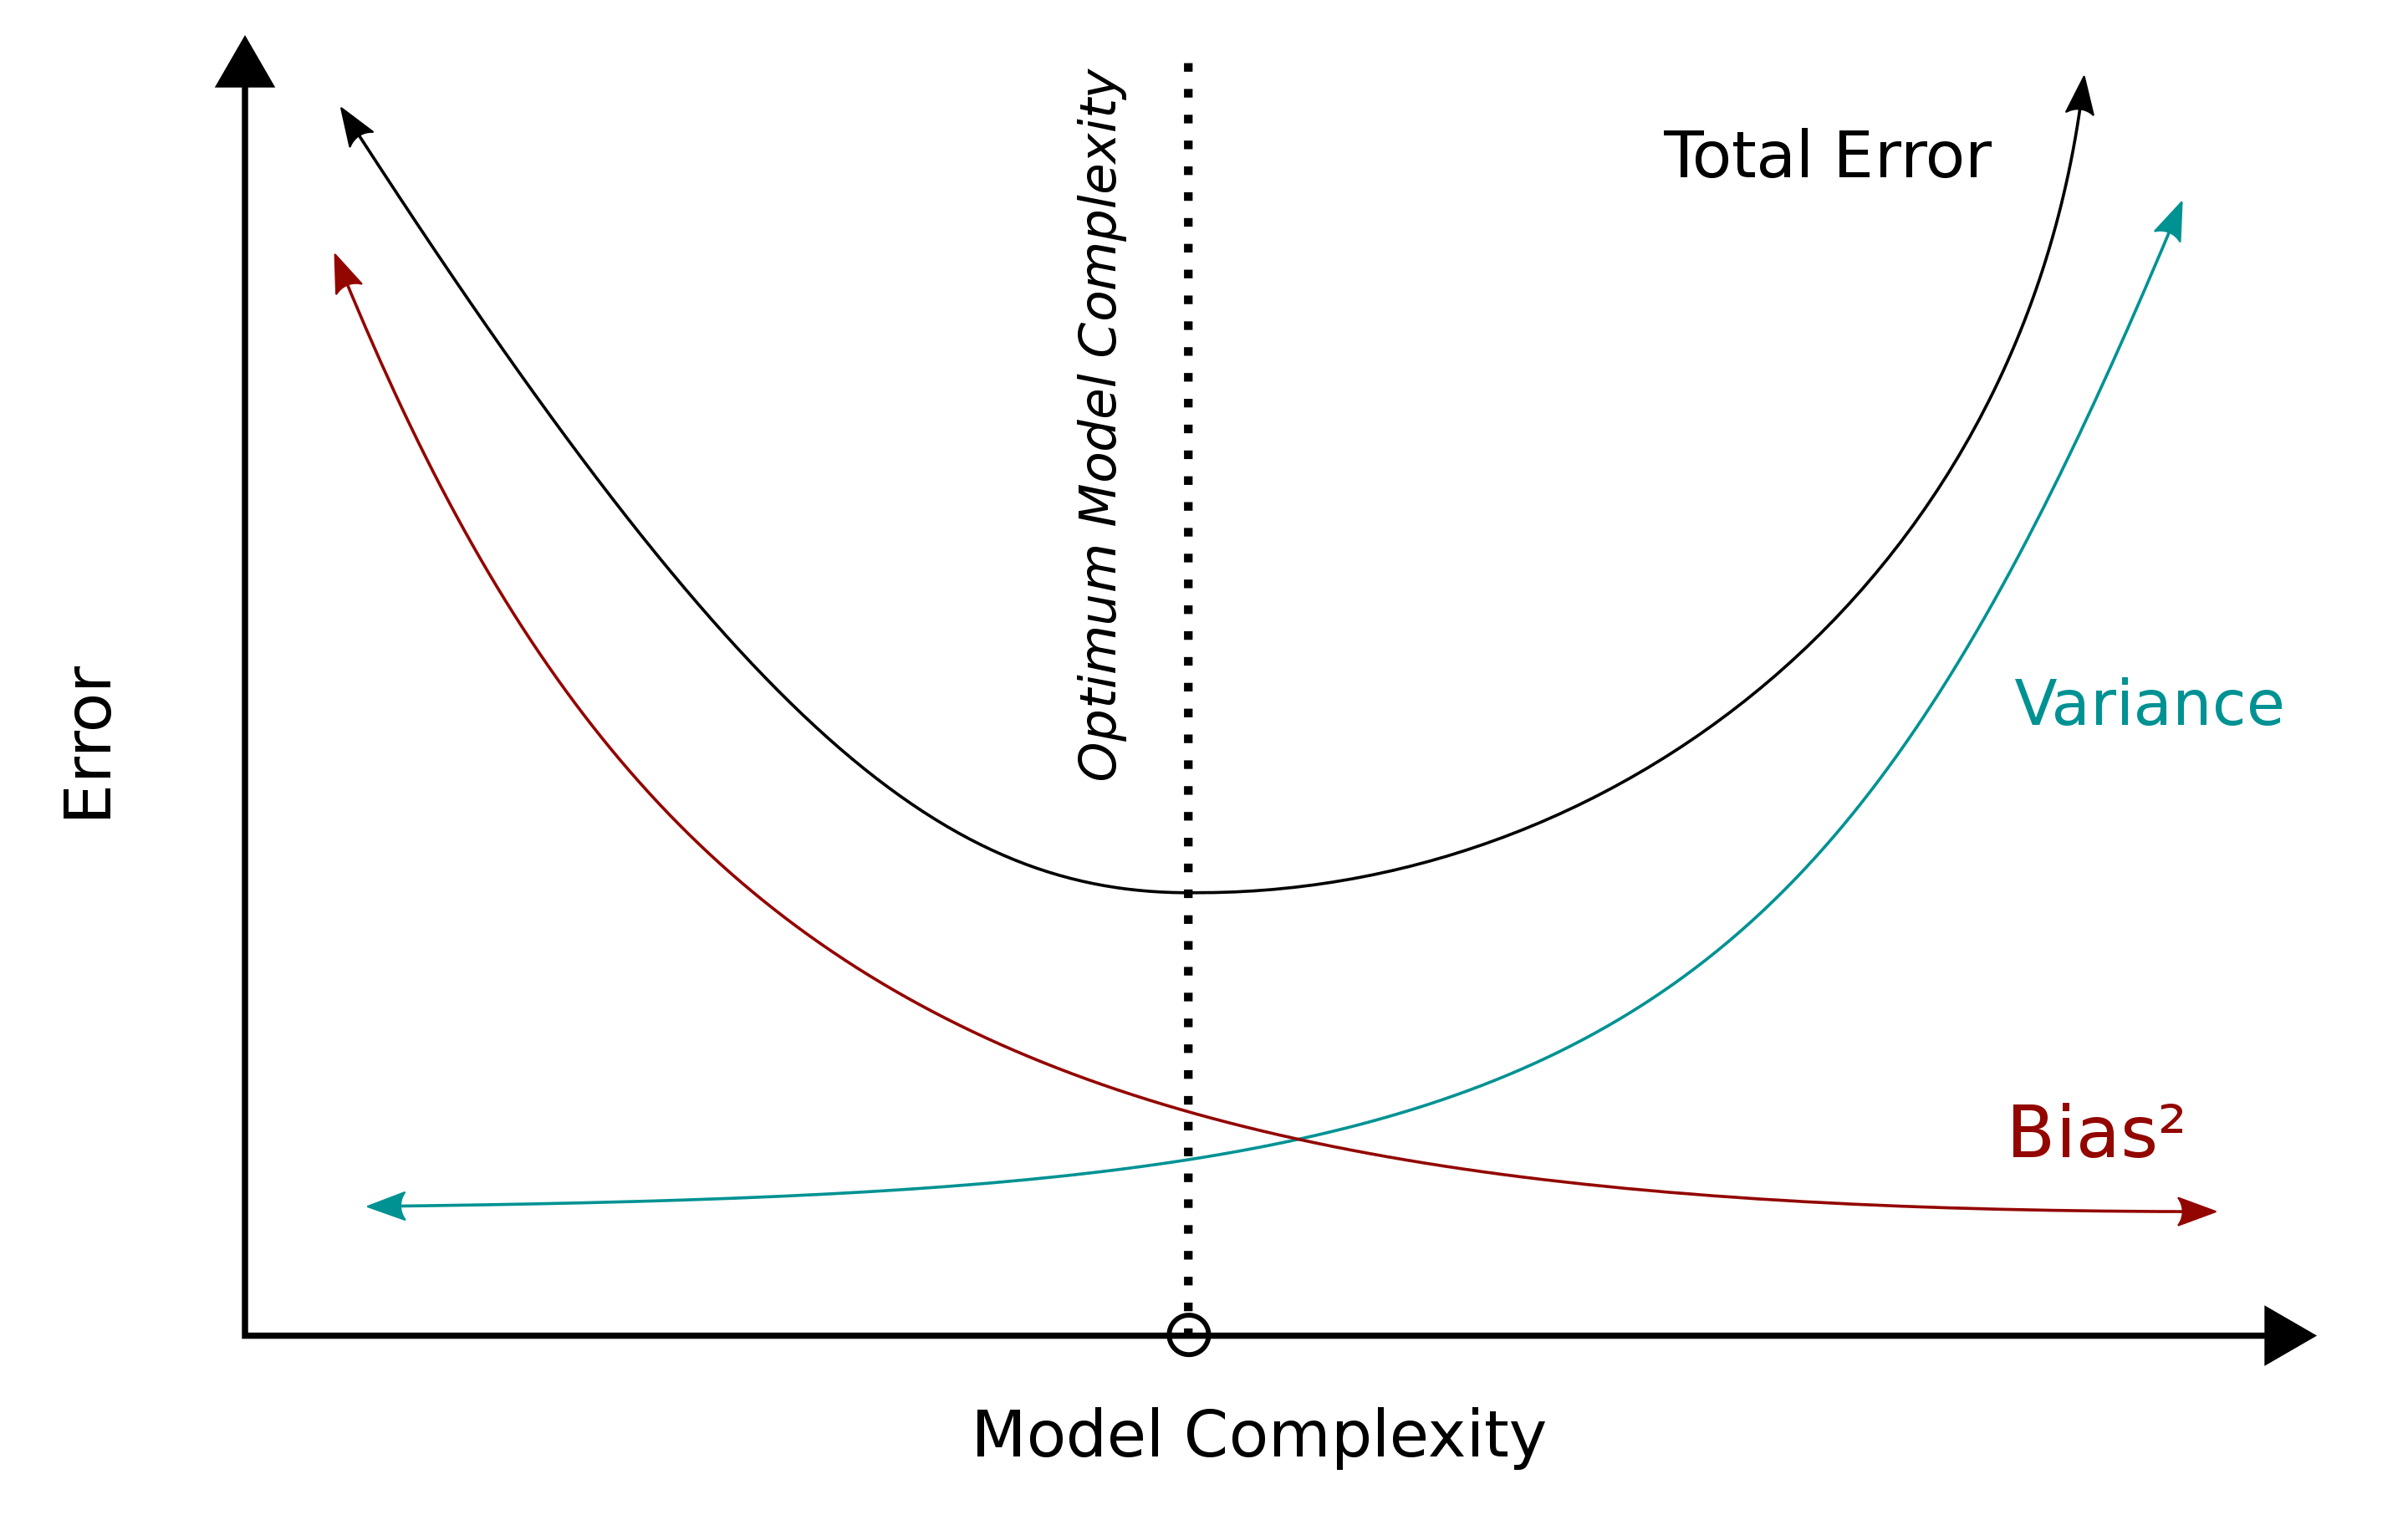

In [ ]:
IPython.display.Image('bias_variance_3.png', width = 700, height = 500)

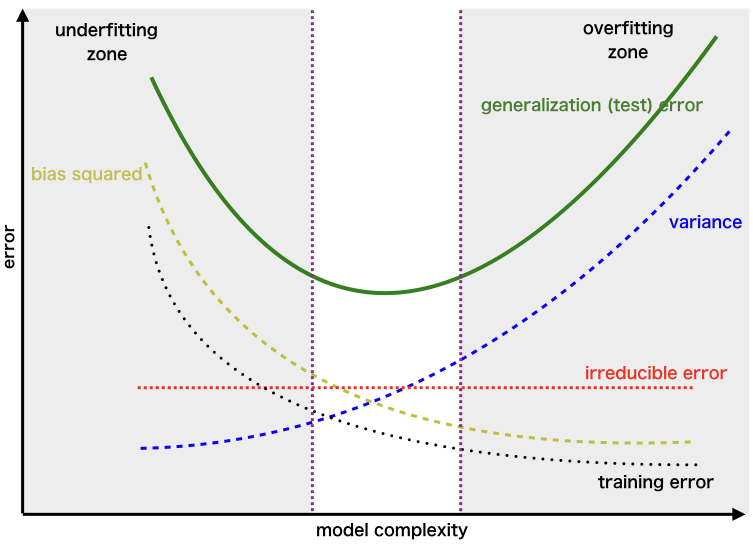

In [ ]:
IPython.display.Image('bias_variance_1.png', width = 700, height = 500)

We can use the idea of __model complexity__ to represent this trade off for any loss function and model family

Statistical Learning Theory tells us
 - More complex models will fit the training data bettter (low bias)
 - Less complex models will generalize better


What is model complexity?
 - We abstractly think of this as the models __capacity__ to fit the data
 - Bigger model families $\mathcal{F}$ allow for more complexity


Theory: \\
Given a loss function $\mathcal{L}$ and data $X$ and $Y$, if 
$$\mathcal{F}_1 \subset \mathcal{F}_2$$ 
then 
$$\min_{f \in F_2} \mathcal{L}(f, (x, y)) \leq \min_{f \in F_1} \mathcal{L}(f, (x, y)) $$


This means that if we have a big family of models that contains a smaller family of models then the big family will always have an equal or better minimizer of the training loss than the small family 
- By chosing a bigger family you will never increase the training error
- Up to numerical issues of course


__Example__: \\
$\mathcal{F}_1$ is all linear models $\alpha + \beta_1 X$ \\
$\mathcal{F}_2$ is all cubic models $\alpha + \beta_1 X + \beta_2 X^2 + \beta_3 x^3$

### Regularization

One way of controlling model complexity and hopefully the test error is by restricting the class of models to a small model family

The danger is that we will __underfit__ the data because our model fundamentally can't learn the relationship between $X$ and $Y$.
- Ex. if we use a simple linear model $f(X) = \alpha + \beta X$ we can never hope to accurately fit $f(x) = \beta \sin(X)$
- We will always have __high bias__ in this case

Restricting the model class to be extremely simple is therefore not the predominant strategy anymore.

Current strategy 
 - Use as big a family as possible 
 - Introduce __bias__ in the loss function (regularization)

Regularization is a way of penalizing __model complexity__

That is we modify the loss function so that it picks a model in our family $\mathcal{F}$ with low complexity. The hope is that we can semi-automatically balance the bias / variance tradeoff.
- You will still always check with a train/test split

The loss is modified to take a form like this 
$$\mathcal{L}(f, (x, y)) + \mathcal{R}(f)$$

- $\mathcal{L}(f, (x, y))$ encourages the model towards optimal solutions on the training set (low bias)
- $\mathcal{R}(f)$ penalizes the complexity (variance) of the model 
- By minimizing the sum we achieve the goal of low bias and low variance for $f$ simultaneously





The form of $\mathcal{R}(f)$ can vary greatly and is the subject of much research! How you go about penalizing model complexity can vary greatly depending on what you need to do.

This is not something you need to worry about explictly in this class. However, we will use standard regularization procedures so its good to know whats going on.

__Example__: Suppose we are interested in the fitting the following function
$$ Y = \alpha + \beta_1 X + \beta_2 X^2 + \epsilon$$

If we train  with the standard $MSE$ loss 
$$ MSE(f, (x, y)) = \frac{1}{n} \sum_{i =1}^n (y_i - (\alpha + \beta_1 x_i + \beta_2 x_i^2))^2$$

It will find $\hat{\alpha}, \hat{\beta}_1, \hat{\beta}_2$ that minimzie the bias between $Y$ and $f(X) = \hat{\alpha} + \hat{\beta}_1 X + \hat{\beta}_2 X^2$

Instead if we __regularize__ the coefficients by using the modified loss 
$$ MSE(f, (x, y)) = \frac{1}{n} \sum_{i =1}^n (y_i - (\alpha + \beta_1 x_i + \beta_2 x_i^2))^2 + \lambda(\alpha^2 + \beta_1^2 + \beta_2^2)$$

Now, minimization has to find $\hat{\alpha}, \hat{\beta}_1, \hat{\beta}_2$ that minimize the bias __AND__ have small values 
- i.e. the model is encouraged towards solutions with low variance (less wiggly)

## Conclusion

1. Evaluating on your training dataset is not enough. Otherwise you suffer from overfitting
2. You need to measure out of sample (test) accuracy
   - We do this with sample splitting (train/test) split
3. The loss gives us insight into model behavior
   - Bias and Variance describe accuracy on train and model complexity
   - We want model that are accurate (low bias) and generalize well (low variance)
4. Current practice is to modify the loss function with regularization to achieve both
 - Many packages do this for you
 - More on this later!